In [1]:
% matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import model_list, models, fitting
import matplotlib.lines as mlines
import corner
import copy as cp

from utils import rj2cmb

In [3]:
mean_beta = 1.6
mean_temp = 20.
sigma_beta = .2
sigma_temp = 4.

In [4]:
test = model_list.prob1mbb_model
control = model_list.dust_model
cmb = model_list.cmb_model

In [5]:
DUST_I = 50.
DUST_P = 5. / 1.41
amp_I=rj2cmb(353e9, DUST_I)
amp_Q=rj2cmb(353e9, DUST_P)
amp_U=rj2cmb(353e9, DUST_P)

test_smallvar = models.ProbSingleMBB(amp_I=rj2cmb(353e9, DUST_I),
                             amp_Q=rj2cmb(353e9, DUST_P),
                             amp_U=rj2cmb(353e9, DUST_P),
                             dust_beta=1.6, dust_T=20.,
                             sigma_beta=.1 * sigma_beta, sigma_temp=.1 * sigma_temp)

In [6]:
nu = np.logspace(np.log10(30), np.log10(500), 7) * 1e9

In [ ]:
print plt.rcParams['axes.prop_cycle'].by_key()['color']

In [7]:
models_fit = [control, cmb] 
amp_names = []
param_names = []

for mod in models_fit:
        # Parameter names
        amp_names += ["%s_%s" % (mod.model, pol) for pol in "IQU"]
        param_names += mod.param_names

In [8]:
pnames_MBB = cp.copy(amp_names + param_names)
pnames_MBB

['mbb_I', 'mbb_Q', 'mbb_U', 'cmb_I', 'cmb_Q', 'cmb_U', 'dust_beta', 'dust_T']

In [ ]:
pnames_MBB, pnames_probMBB

In [ ]:
fsigma_T=1.
fsigma_P=10e3

beam_mat = np.identity(3*len(nu)) # Beam model

# pvals set the model parameters 
params_MBB = [control.amp_I, control.amp_Q, control.amp_U, cmb.amp_I, cmb.amp_Q, cmb.amp_U,
              control.dust_beta, control.dust_T]
params_probMBB = [test.amp_I, test.amp_Q, test.amp_U, cmb.amp_I, cmb.amp_Q, cmb.amp_U,
                  test.dust_beta, test.dust_T, test.sigma_beta, test.sigma_temp]

initial_vals_MBB = (amp_I, amp_Q, amp_U, cmb.amp_U, cmb.amp_I, cmb.amp_Q, mean_beta, mean_temp)
initial_vals_probMBB = (amp_I, amp_Q, amp_U, cmb.amp_U, cmb.amp_I, cmb.amp_Q,
                        mean_beta, mean_temp, sigma_beta, sigma_temp)
parent_model = 'mbb'

D_vec_MBB, Ninv = fitting.generate_data(nu, fsigma_T, fsigma_P, [control, cmb])
D_vec_probMBB, Ninv = fitting.generate_data(nu, fsigma_T, fsigma_P, [test, cmb])

data_spec_MBB = (nu, D_vec_MBB, Ninv, beam_mat)
data_spec_probMBB = (nu, D_vec_probMBB, Ninv, beam_mat)

p_spec_MBB = (pnames_MBB, initial_vals_MBB, parent_model)
p_spec_probMBB = (pnames_probMBB, initial_vals_probMBB, parent_model)
    
fitting.lnprob_joint(params_MBB, data_spec_MBB, [control, cmb], p_spec_MBB), fitting.lnprob_joint(params_probMBB, data_spec_probMBB, [control, cmb], p_spec_probMBB)

In [ ]:
logp_control.argmax() # , logp_mixed.max()

In [ ]:
samples_control[0][logp_control.argmax()]

In [ ]:
dof = len(D_vec_MBB) - len(pnames_MBB)
dof

In [ ]:
from scipy import stats

In [ ]:
x = np.linspace(stats.chi2.ppf(0.01, dof), stats.chi2.ppf(0.99, dof), 100)

In [ ]:
pnames_out_control, pnames_out_test

In [ ]:
#plt.plot(nu/1e9, D_vec_probMBB[0:7])
plt.plot(nu/1e9, D_vec_probMBB[0:7] - D_vec_MBB[0:7])

In [ ]:
pnames_out_control, samples_control, logp_control  = fitting.joint_mcmc(data_spec_MBB, [control, cmb], p_spec_MBB, nwalkers=20, 
               burn=0, steps=100, nthreads=2, sample_file=None)



In [11]:
rho = np.zeros_like(covs[1])

for i in range(len(samples_control)):
    for j in range(len(samples_control)):
        
        rho[i][j] = covs[1][i][j] / np.sqrt(covs[1][i][i] * covs[1][j][j])    
       

In [12]:
rho

array([[ 1.        , -0.0087696 ,  0.05521092,  0.21296197, -0.0076372 ,
        -0.02859494,  0.44759586, -0.50211738],
       [-0.0087696 ,  1.        , -0.01258103, -0.01008299, -0.48836281,
         0.0036535 , -0.01102557,  0.01215474],
       [ 0.05521092, -0.01258103,  1.        , -0.00948107,  0.01300009,
        -0.49353405,  0.0084136 , -0.01329712],
       [ 0.21296197, -0.01008299, -0.00948107,  1.        , -0.00355397,
        -0.00709164,  0.94159948, -0.90770915],
       [-0.0076372 , -0.48836281,  0.01300009, -0.00355397,  1.        ,
         0.00379375, -0.00524035,  0.00581518],
       [-0.02859494,  0.0036535 , -0.49353405, -0.00709164,  0.00379375,
         1.        , -0.01320508,  0.01429868],
       [ 0.44759586, -0.01102557,  0.0084136 ,  0.94159948, -0.00524035,
        -0.01320508,  1.        , -0.99254907],
       [-0.50211738,  0.01215474, -0.01329712, -0.90770915,  0.00581518,
         0.01429868, -0.99254907,  1.        ]])

In [ ]:
plt.matshow(rho, vmin=-1., vmax=1.)
plt.colorbar()

In [15]:
deltas = np.empty(runs, dtype=object)
avgs = np.empty(runs)


for i in range(runs):
    deltas[i] = np.asarray([best_fits[i][j] - truths[j] for j in range(len(truths))])

    for j in range(len(truths)):
        avgs[j]  += deltas[i][j]


In [ ]:
best_fits

In [ ]:
truths

In [16]:
delta_reshaped = np.empty(len(truths), dtype=object)

for i in range(len(truths)):
    delta_reshaped[i] = [deltas[j][i] for j in range(runs)]
    

Text(0.5,0.98,'fitting single MBB model to prob MBB data')

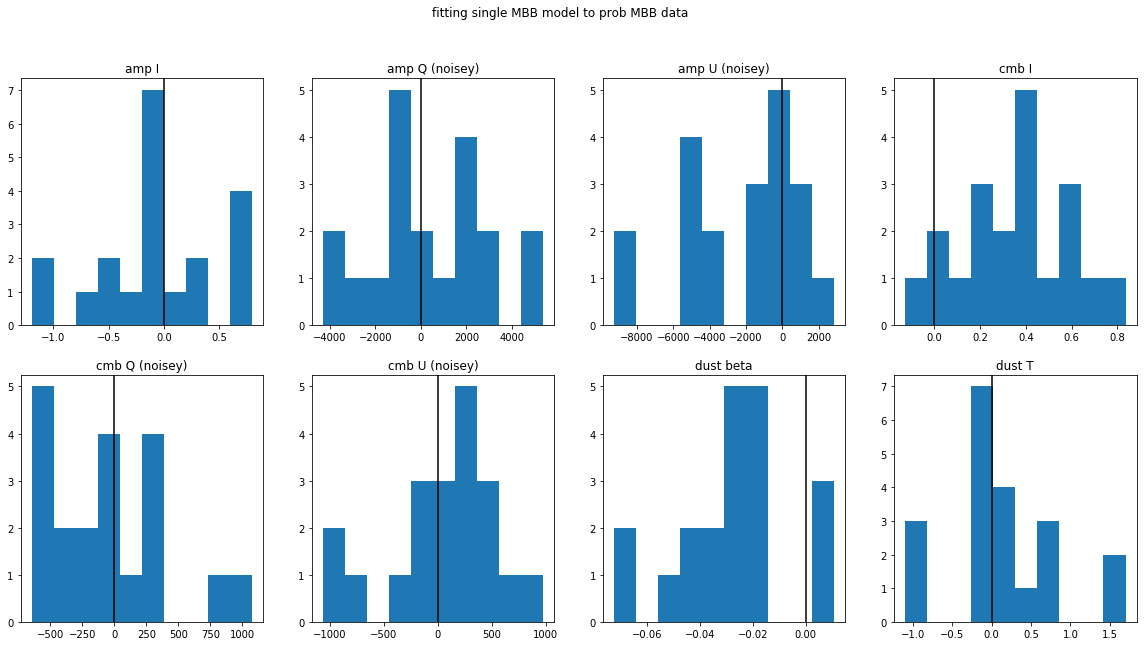

In [18]:
fig, ((ax1, ax2, ax3, ax4), (ax6, ax7, ax8, ax9)) = plt.subplots(2, 4)
fig.set_figwidth(20)
fig.set_figheight(10)

ax1.hist(delta_reshaped[0])
ax2.hist(delta_reshaped[1])
ax3.hist(delta_reshaped[2])
ax4.hist(delta_reshaped[3])

ax6.hist(delta_reshaped[4])
ax7.hist(delta_reshaped[5])
ax8.hist(delta_reshaped[6])
ax9.hist(delta_reshaped[7])

ax1.axvline(0.0, c='k')
ax2.axvline(0.0, c='k')
ax3.axvline(0.0, c='k')
ax4.axvline(0.0, c='k')

ax6.axvline(0.0, c='k')
ax7.axvline(0.0, c='k')
ax8.axvline(0.0, c='k')
ax9.axvline(0.0, c='k')

ax1.set_title('amp I')
ax2.set_title('amp Q (noisey)')
ax3.set_title('amp U (noisey)')
ax4.set_title('cmb I')

ax6.set_title('cmb Q (noisey)')
ax7.set_title('cmb U (noisey)')
ax8.set_title('dust beta')
ax9.set_title('dust T')

fig.suptitle('fitting single MBB model to prob MBB data')

In [9]:
runs = 20

fsigma_T=1.
fsigma_P=10e3
beam_mat = np.identity(3*len(nu)) # Beam model
params_MBB = [control.amp_I, control.amp_Q, control.amp_U, cmb.amp_I, cmb.amp_Q, cmb.amp_U, control.dust_beta,
              control.dust_T]

initial_vals_MBB = (amp_I, amp_Q, amp_U, control.amp_U, cmb.amp_I, cmb.amp_Q, mean_beta, mean_temp)

parent_model = 'mbb'

logps = np.empty(runs)
covs = np.empty(runs, dtype=object)
best_fits = np.empty(runs, dtype=object)

for i in range(runs):
    
    D_vec_MBB, Ninv = fitting.generate_data(nu, fsigma_T, fsigma_P, [test, cmb])
    #D_vec_probMBB, Ninv = fitting.generate_data(nu, fsigma_T, fsigma_P, [test, cmb])

    data_spec_MBB = (nu, D_vec_MBB, Ninv, beam_mat)
    #data_spec_probMBB = (nu, D_vec_probMBB, Ninv, beam_mat)

    p_spec_MBB = (pnames_MBB, initial_vals_MBB, parent_model)
    #p_spec_probMBB = (pnames_probMBB, initial_vals_probMBB, parent_model)
    
    pnames_out_control, samples_control, logp_control  = fitting.joint_mcmc(data_spec_MBB, [control, cmb], p_spec_MBB, nwalkers=20, 
               burn=1000, steps=10000, nthreads=2, sample_file=None)
    
    logps[i] = logp_control.max()
    covs[i] = np.cov(samples_control)
    best_fits[i] = [samples_control[j][logp_control.argmax()] for j in range(len(pnames_MBB))]
    

    # pnames_out_mixed, samples_mixed, logp_mixed  = fitting.joint_mcmc(data_spec_probMBB, [control, cmb], p_spec_MBB, nwalkers=20, 
    #          burn=1000, steps=10000, nthreads=2, sample_file=None)


In [10]:
covs

array([array([[ 2.27227492e-01, -1.96182982e+01,  4.85993101e+00,
         2.16439371e-02,  6.62974789e+00,  7.49868315e-01,
         4.04938705e-03, -1.58597584e-01],
       [-1.96182982e+01,  1.18786578e+07,  5.36224439e+04,
        -3.48803815e+01, -8.28201826e+05, -1.20975356e+04,
        -2.90777964e+00,  1.02221524e+02],
       [ 4.85993101e+00,  5.36224439e+04,  1.17958927e+07,
         1.43799408e+01, -1.96430381e+04, -8.06811609e+05,
         9.33091367e-01, -2.49879275e+01],
       [ 2.16439371e-02, -3.48803815e+01,  1.43799408e+01,
         4.90696096e-02,  2.94080604e+00,  9.49301392e-01,
         4.08777175e-03, -1.36570582e-01],
       [ 6.62974789e+00, -8.28201826e+05, -1.96430381e+04,
         2.94080604e+00,  2.47339675e+05,  4.93287172e+03,
         2.84297617e-01, -9.51670216e+00],
       [ 7.49868315e-01, -1.20975356e+04, -8.06811609e+05,
         9.49301392e-01,  4.93287172e+03,  2.37967829e+05,
         1.51718414e-01, -5.97892606e+00],
       [ 4.04938705e-03, -2

In [ ]:
import time
t0 = time.time()
pnames_out_test, samples_test, logp_test  = fitting.joint_mcmc(data_spec_probMBB, [test, cmb], p_spec_probMBB, nwalkers=20, 
               burn=100, steps=10000, nthreads=4, sample_file=None)

print time.time() - t0

In [ ]:
samples_control = samples_control.reshape(8, 20, 10000)
samples_mixed = samples_mixed.reshape(8, 20, 10000)
samples_test = samples_test.reshape(10, 20, 10000)

In [ ]:
np.shape(samples_control.reshape(5, 20*5000))

In [ ]:
cmb.amp_I

In [ ]:
fig, ((ax1, ax2, ax3, ax4), (ax6, ax7, ax8, ax9)) = plt.subplots(2, 4)
fig.set_figwidth(20)
fig.set_figheight(10)

for i in range(0,20):
    ax1.plot(samples_control[0][i])
    ax2.plot(samples_control[3][i])
    ax3.plot(samples_control[6][i])
    ax4.plot(samples_control[7][i])
    #ax5.plot(samples_control[4][i])
    

ax6.hist(samples_control[0].flatten())
ax7.hist(samples_control[3].flatten())
ax8.hist(samples_control[6].flatten())
ax9.hist(samples_control[7].flatten())
#ax10.hist(samples_control[4].flatten())
    
ax1.axhline(amp_I)
ax2.axhline(cmb.amp_I)
ax3.axhline(mean_beta)
ax4.axhline(mean_temp)
#ax5.axhline(mean_temp)

ax6.axvline(amp_I, c='k')
ax7.axvline(cmb.amp_I, c='k')
ax8.axvline(mean_beta, c='k')
ax9.axvline(mean_temp, c='k')
#ax10.axvline(mean_temp, c='k')

ax1.set_title('amp I')
ax2.set_title('cmb I')
ax3.set_title('dust_beta')
ax4.set_title('dust_T')
#ax5.set_title('mean temp')

ax6.set_title('amp I')
ax7.set_title('cmb I')
ax8.set_title('dust_beta')
ax9.set_title('dust_T')
#ax10.set_title('mean temp')

In [ ]:
fig, ((ax1, ax2, ax3, ax4), (ax6, ax7, ax8, ax9)) = plt.subplots(2, 4)
fig.set_figwidth(20)
fig.set_figheight(10)

for i in range(0,20):
    ax1.plot(samples_mixed[0][i])
    ax2.plot(samples_mixed[3][i])
    ax3.plot(samples_mixed[6][i])
    ax4.plot(samples_mixed[7][i])
    #ax5.plot(samples_control[4][i])
    

ax6.hist(samples_mixed[0].flatten())
ax7.hist(samples_mixed[3].flatten())
ax8.hist(samples_mixed[6].flatten())
ax9.hist(samples_mixed[7].flatten())
#ax10.hist(samples_control[4].flatten())
    
ax1.axhline(amp_I)
ax2.axhline(cmb.amp_I)
ax3.axhline(mean_beta)
ax4.axhline(mean_temp)
#ax5.axhline(mean_temp)

ax6.axvline(amp_I, c='k')
ax7.axvline(cmb.amp_I, c='k')
ax8.axvline(mean_beta, c='k')
ax9.axvline(mean_temp, c='k')
#ax10.axvline(mean_temp, c='k')

ax1.set_title('amp I')
ax2.set_title('cmb I')
ax3.set_title('dust_beta')
ax4.set_title('dust_T')
#ax5.set_title('mean temp')

ax6.set_title('amp I')
ax7.set_title('cmb I')
ax8.set_title('dust_beta')
ax9.set_title('dust_T')
#ax10.set_title('mean temp')

In [ ]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
fig.set_figwidth(15)
fig.set_figheight(10)

for i in range(0,20):
    ax1.plot(samples_test[0][i])
    ax2.plot(samples_test[3][i])
    ax3.plot(samples_test[6][i])
    ax4.plot(samples_test[7][i])
    ax5.plot(samples_test[8][i])
    ax6.plot(samples_test[9][i])
    
ax1.axhline(amp_I)
ax2.axhline(cmb.amp_I)
ax3.axhline(mean_beta)
ax4.axhline(mean_temp)
ax5.axhline(sigma_beta)
ax6.axhline(sigma_temp)

ax1.set_title('amp I')
ax2.set_title('cmb I')
ax3.set_title('mean beta')
ax4.set_title('mean temp')
ax5.set_title('sigma beta')
ax6.set_title('sigma temp')

In [ ]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4)
fig.set_figwidth(15)
fig.set_figheight(10)

ax1.hist(samples_test[0].flatten())
ax2.hist(samples_test[1].flatten())
ax3.hist(samples_test[2].flatten())
ax4.hist(samples_test[3].flatten())
ax5.hist(samples_test[4].flatten())
ax6.hist(samples_test[5].flatten())
ax7.hist(samples_test[6].flatten())
    
ax1.axvline(amp_I, c='k')
ax2.axvline(amp_Q, c='k')
ax3.axvline(amp_U, c='k')
ax4.axvline(mean_beta, c='k')
ax5.axvline(mean_temp, c='k')
ax6.axvline(sigma_beta, c='k')
ax7.axvline(sigma_temp, c='k')

ax1.set_title('amp I')
ax2.set_title('amp Q (noisey)')
ax3.set_title('amp U (noisey)')
ax4.set_title('mean beta')
ax5.set_title('mean temp')
ax6.set_title('sigma beta')
ax7.set_title('sigma temp')

In [ ]:
plt.hist(samples_test[0].flatten())

In [ ]:
logp_control.sum() / len(logp_control), logp_test.sum() / len(logp_test)

In [ ]:
plt.plot(samples[0,:], samples[3, :], 'r.', alpha=0.2)
plt.plot(amp_I, mean_beta, 'kx')
print np.std(samples[0])

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_figwidth(15)
fig.set_figheight(6)

ax1.plot(logp_control)
ax1.set_title('logp: control')

for i in range(20):
    ax1.axvline(i * 5000, c='k')

ax2.plot(logp_test)

for i in range(20):
    ax2.axvline(i * 5000, c='k')
    
ax2.set_title('logp: test')

In [ ]:
np.shape(logp_control)

In [ ]:
fsigma_T=1.
fsigma_P=10e3

beam_mat = np.identity(3*len(nu)) # Beam model
params_MBB = [control.amp_I, control.amp_Q, control.amp_U, cmb.amp_I, cmb.amp_Q, cmb.amp_U, control.dust_beta,
              control.dust_T]

params_probMBB = [test.amp_I, test.amp_Q, test.amp_U, test.dust_beta,
              test.dust_T, test.sigma_beta, test.sigma_temp]

initial_vals_MBB = (amp_I, amp_Q, amp_U, control.amp_U, cmb.amp_I, cmb.amp_Q, mean_beta, mean_temp)
initial_vals_probMBB = (amp_I, amp_Q, amp_U,
                        mean_beta, mean_temp, sigma_beta, sigma_temp)
parent_model = 'mbb'

D_vec_MBB_Planck, Ninv_Planck = fitting.generate_data(nu, fsigma_T, fsigma_P, [control], noise_file='data/noise_planck.dat')
D_vec_probMBB_Planck, Ninv_Planck = fitting.generate_data(nu, fsigma_T, fsigma_P, [test], noise_file='data/noise_planck.dat')

data_spec_MBB_Planck = (nu, D_vec_MBB, Ninv_Planck, beam_mat)
data_spec_probMBB_Planck = (nu, D_vec_probMBB, Ninv_Planck, beam_mat)

p_spec_MBB = (pnames_MBB, initial_vals_MBB, parent_model)
p_spec_probMBB = (pnames_probMBB, initial_vals_probMBB, parent_model)
    
fitting.lnprob_joint(params_MBB, data_spec_MBB_Planck, [control], p_spec_MBB), fitting.lnprob_joint(params_probMBB, data_spec_probMBB_Planck, [test], p_spec_probMBB)


In [ ]:
fitting.lnprob_joint(params_probMBB, data_spec_MBB_Planck, [test], p_spec_MBB)

In [ ]:
import time
t0 = time.time()
fitting.lnprob_joint(params_probMBB, data_spec_probMBB_Planck, [test], p_spec_probMBB)
print time.time() - t0


In [ ]:
fitting.lnprob_joint(params_MBB, data_spec_MBB_Planck, [control], p_spec_MBB), fitting.lnprob_joint(params_MBB, data_spec_MBB, [control], p_spec_MBB)

In [ ]:
fitting.lnprob_joint(params_MBB, data_spec_probMBB_Planck, [control], p_spec_MBB), fitting.lnprob_joint(params_MBB, data_spec_probMBB, [control], p_spec_MBB)

In [ ]:
plt.figure(figsize=(10,7))
plt.errorbar(nu/1e9, test.scaling(nu)[0],
             yerr=1./np.sqrt(np.diag(Ninv))[:7], lw=3)
plt.errorbar(nu/1e9, test.scaling(nu)[0],
             yerr=1./np.sqrt(np.diag(Ninv_Planck))[:7], lw=3, alpha=.5)

In [ ]:
I_test = test.scaling(nu)[0] * test.amps()[0]
I_control = control.scaling(nu)[0] * control.amps()[0]
I_data = np.array(D_vec[:7]).flatten()
err_I = 1./np.sqrt(np.diag(Ninv))[:7]

In [ ]:
x, y = np.random.multivariate_normal((0., 1.), np.eye(2), size=5000).T

In [ ]:
plt.plot(x,y, 'r.')

In [ ]:
ax = corner.corner(np.column_stack((x,y)))

In [ ]:
s = np.column_stack((samples_control[3].flatten(), samples_control[4].flatten()))

In [ ]:
20 * 10000 * 10

In [ ]:
samples_test.shape

In [ ]:
s_T = samples_mixed.reshape((8, 200000)).T
s_T.shape

In [ ]:
ax = corner.corner(s_T, plot_datapoints=False, labels=labels, truths=truths)

In [ ]:
mean_beta, mean_temp

In [ ]:
sigma_beta, sigma_temp

In [14]:
labels = ['amp_I', 'amp_Q', 'amp_U', 'cmb_I', 'cmb_Q', 'cmb_U', 'mean_beta', 'mean_temp', 'sigma_beta', 'sigma_temp']
the_range = [0.999, (1., 100.), (1., 100.), 0.999, 0.999, 0.999, (1.4, 1.8), (16., 24.), (1e-2, 1.), (.1, 10.)]
truths = [amp_I, amp_Q, amp_U, cmb.amp_I, cmb.amp_Q, cmb.amp_U, mean_beta, mean_temp]

In [ ]:
np.isinf(samples_test).sum()

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_figwidth(15)

ax1.hist(samples_)

In [ ]:
test = [i for i in range(10)]
test

In [ ]:
test2 = np.empty((6, 10), dtype=object)

for i in range(6):
    test2[i][:] = np.asarray(test)

In [ ]:
test2.T[1]